# Part 1: Defining Risk, emprical risk, local and global minimum, saddle point with visualizations.

In [1]:
%matplotlib inline
import numpy as np
import torch 
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

To illustrate the aforementioned different goals, let’s consider the empirical risk and the risk. The empirical risk is an average loss on the training dataset while the risk is the expected loss on the entire population of data. Below we define two functions: the risk function f and the empirical risk function g. Suppose that we have only a finite amount of training data. As a result, here g is less smooth than f.

In [2]:
def f(x):
    return x*torch.cos(np.pi*x)

def g(x):
    return f(x) + 0.2*torch.cos(5*np.pi*x)

The minimum of the empirical risk on a training dataset may be at a different location from the minimum of the risk (generalization error).

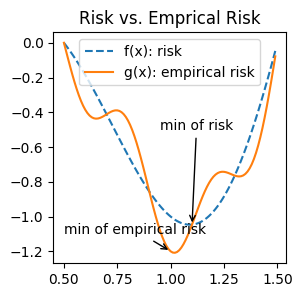

In [3]:
x = torch.arange(0.5, 1.5, 0.01)

plt.figure(figsize=(3,3))
plt.plot(x, f(x), label="f(x): risk", linestyle="--")
plt.plot(x, g(x), label="g(x): empirical risk")

plt.annotate("min of empirical risk",
             xy=(1.0, -1.2), xytext=(0.5, -1.1),
             arrowprops=dict(arrowstyle="->"))

plt.annotate("min of risk",
             xy=(1.1, -1.05), xytext=(0.95, -0.5),
             arrowprops=dict(arrowstyle="->"))
plt.title("Risk vs. Emprical Risk")
plt.legend()
plt.grid(False)
plt.show()

## Optimization challenges in deep learning

### Local minimum vs. Global minimum
------------------------------------------------------
The objective function of deep learning models usually has many local optima. When the numerical solution of an optimization problem is near the local optimum, the numerical solution obtained by the final iteration may only minimize the objective function locally, rather than globally, as the gradient of the objective function’s solutions approaches or becomes zero.

Solution: Only some degree of noise might knock the parameter out of the local minimum.

Text(0.6, 0.8, 'global minimum')

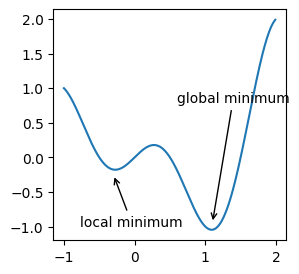

In [4]:
x = torch.arange(-1.0, 2.0, 0.01)
plt.figure(figsize=(3,3))
plt.plot(x, f(x))
plt.annotate('local minimum', (-0.3, -0.25), (-0.77, -1.0),
                        arrowprops=dict(arrowstyle="->"))
plt.annotate('global minimum', (1.1, -0.95), (0.6, 0.8),
                            arrowprops=dict(arrowstyle="->"))

## Saddle points 
---------------------------------------------------------------
Besides local minima, saddle points are another reason for gradients to vanish. A saddle point is any location where all gradients of a function vanish but which is neither a global nor a local minimum.

e.g. $f(x) = x^3$

Text(-0.52, -5.0, 'saddle point')

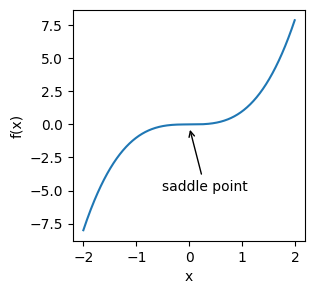

In [7]:
plt.figure(figsize = (3,3))
x = torch.arange(-2.0, 2.0, 0.01)
plt.plot(x, x**3)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.annotate('saddle point', (0, -0.2), (-0.52, -5.0), 
                        arrowprops=dict(arrowstyle="->"))

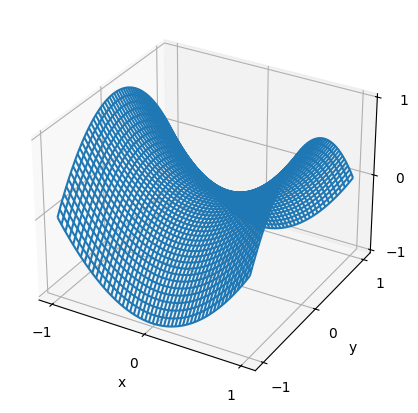

In [18]:
## Saddle pointsin higher dimension
x, y = torch.meshgrid(
    torch.linspace(-1.0, 1.0, 101), torch.linspace(-1.0, 1.0, 101)
) 

z = x**2 -y**2

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(x,y,z,
                  rstride=2, cstride=2)
ticks = [-1, 0, 1]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.show()